# Reducción de la dimensionalidad a través de Descomposición en Valores Singulares (SVD)

En este notebook vamos a explorar dos aplicaciones de descomposición en valores singulares (SVD por sus siglas en inglés) a reducción de la dimensión de datasets. La metodología es realmente muy útil, con montones de aplicaciones a análisis de imágenes, reconstrucción de sistemas dinámicos, detección de comunidades en redes, reducción de la dimensión de datasets extensos, y muchas otras. Recordemos que dada una matriz $A \in \mathbb{R}^{n \times m}$, se puede factorizar como

$$
A = U \Sigma V^t
$$

donde $U\in\mathbb{R}^{n \times n}$ y $V\in\mathbb{R}^{m \times m}$ son matrices ortogonales, y $\Sigma \in \mathbb{R}^{n \times m}$ es una matriz diagonal con elementos $\sigma_i \geq 0$ en su diagonal, denominados valores singulares. El rango de la matriz $rank(A)=r$ es igual al número de valores singulares distintos de cero. Dado que los valores singulares están ordenados de manera decreciente por construcción, tenemos que $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r> \sigma_{r+1}=0$.

Las matrices $U$  y $V$ nos proveen (a través de sus columnas) de bases ortonormales del espacio de partida y del de llegada. Dado que los valores singulares posteriores al $r$ son cero, a veces se escribe una versión reducida de la matriz, que sólo incluye la información relevante. En ese caso, tenemos $\tilde \Sigma \in \mathbb{R}^{r \times r}$, una matriz diagonal cuadrada, con los elementos $\sigma_1,\dots,\sigma_r$ en la diagonal, y $\tilde U \in \mathbb{R}^{n \times r}$, con las primeras $r$ columnas de $U$, y $\tilde V \in \mathbb{R}^{m \times r}$, con las primeras $r$ columnas de $V$. Por último, recordemos que la mejor aproximación de una matriz en norma 2 por una de rango $s\leq r$ está dada por la versión reducida de su descomposición SVD incluyendo hasta $s$ valores singulares (en orden decreciente). Notaremos a esta aproximación $A_s = \tilde U_s \tilde \Sigma_s \tilde V^t_s$, donde $\tilde U_s \in \mathbb{R}^{n \times s}$, $\tilde \Sigma_s \in \mathbb{R}^{s \times s}$ y  $\tilde V_s \in \mathbb{R}^{m \times s}$ se definen de forma análoga a la versión reducida, pero tomando sólo $s$ columnas y valores singulares.

## Aplicación 1: "Compresión" de imágenes

Uno de los ejemplos típicos que se emplea para demostrar el poder de reducción del tamaño de un dataset usando SVD es el de compresión de imágenes. Si bien no es un método muy usado para comprimir imágenes, su aplicación sirve de punto de partida para métodos más sofisticados. Por ejemplo, [_Dynamic Mode Decomposition_](https://en.wikipedia.org/wiki/Dynamic_mode_decomposition) emplea estas ideas como punto de partida para identificar movimientos característicos. Pueden ver un video muy simpático [aquí](https://www.youtube.com/shorts/z2-l6MwATYc) donde se muestran los distintos patrones de movimiento que se van encontrando en el agua.

Como motivación, aquí haremos algo más modesto, que es simplemente aplicarlo a imágenes. Para esto, recordemos que una imagen en color puede pensarse como tres matrices (una en rojo, una en verde y una en azul, [RGB](https://en.wikipedia.org/wiki/RGB_color_model)), mientras que una en escala de grises se puede ver directamente como una única matriz. Cada posición $i,j$ de la matriz contiene la intensidad de color (o de gris) de un pixel, mientras que las dimensiones de la matriz representan el tamaño de la imagen. Por simplicidad, consideraremos que tenemos una única matriz $A$ que representa la imagen en escala de grises (el caso general consiste en simplemente en repetir el procedimiento para las matrices asociadas a cada color).

Entonces, la major aproximación que podemos obtener de la matriz $A$ usando una matriz de rango $s$ es $A_s$ como lo definimos más arriba. Pongamos esto a prueba para algunas imágenes, y exploremos qué tal resulta.

In [ ]:
# Paquetes para trabajar con imágenes
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

Empezamos leyendo la imagen de un árbol que acompaña el notebook.

(1082, 2000, 3)


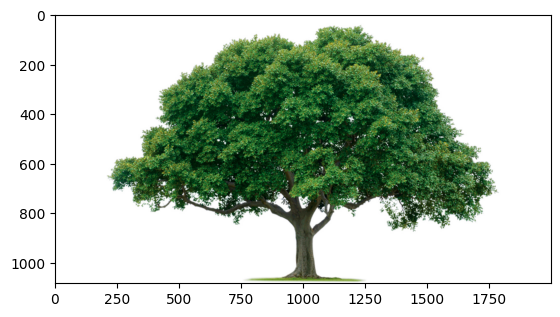

In [ ]:
# Leemos el archivo
img = io.imread('tree2.jpg')

print(img.shape)

plt.imshow(img)

Observen la forma general de la imagen, así como los detalles que incluye. Para la compresión vamos a convertirla a escala de grises, lo cual ya implica una pérdida de información (aunque muchos detalles se preservan).

(1082, 2000)


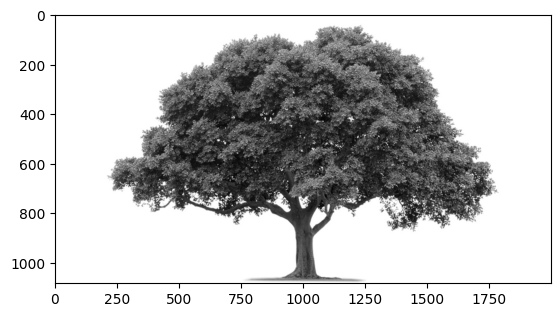

In [ ]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')


Revisemos cuales son los tamaños que dispone la imagen:

In [ ]:
print('La imagen tiene ' + str(imgGray.shape[0]) + ' x ' + str(imgGray.shape[1]) +' pixeles')
print('Es decir, tenemos ' + str(np.prod(imgGray.shape)) + ' pixeles')
print('El rango de la matriz es ' + str(np.linalg.matrix_rank(imgGray)))

La imagen tiene 1082 x 2000 pixeles
Es decir, tenemos 2164000 pixeles
El rango de la matriz es 987


Fijense que si el rango de la matriz es $r$, entonces podemos almacenar toda su información con $r$ valores singulares, más una matriz de $\mathbb{R}^{n \times r}$, más otra de $\mathbb{R}^{m \times r}$. Es decir, necesitamos $r + nr + mr = (n + m + 1)r$ números. Por otro lado, la imagen original requiere guardar $nm$ elementos. Dependiendo del rango de la matriz, la versión SVD reducida ya nos salvaría espacio. Sin embargo, si el rango es grande, la versión reducida requiere más espacio que la matriz original. Este es el caso de la imagen del árbol

In [ ]:
# Ratio de compresion
tamanioRed = (imgGray.shape[0] + imgGray.shape[1] + 1)* np.linalg.matrix_rank(imgGray)
tamanioOrig = imgGray.shape[0] * imgGray.shape[1]
print(tamanioRed)
print(tamanioOrig)

3042921
2164000


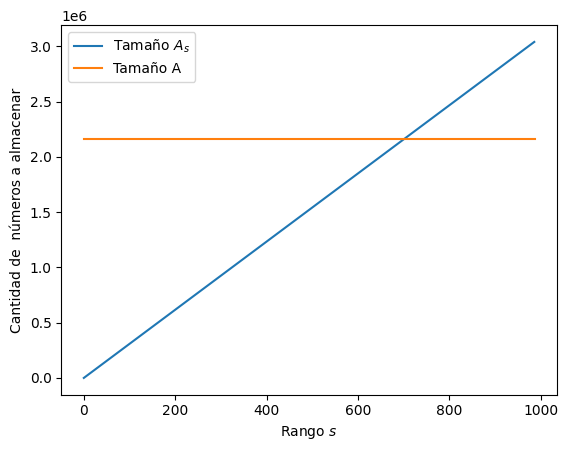

In [ ]:
mrank = np.linalg.matrix_rank(imgGray)
plt.plot(range(0,mrank),(imgGray.shape[0] + imgGray.shape[1] + 1)*np.arange(0,mrank),label='Tamaño $A_s$')
plt.plot([0,mrank],2*[imgGray.shape[0] * imgGray.shape[1]],label='Tamaño A')
plt.xlabel('Rango $s$')
plt.ylabel('Cantidad de  números a almacenar')
plt.legend()

Podemos ver que recién alrededor de $s=700$ (es decir, reducir el rango en 287), puede empezar a ganar espacio en la memoria. La pregunta es: ¿son significativos esos casi 300 valores singulares?

In [ ]:
# Calculemos la descomposición de la imagen

U,S,Vt = np.linalg.svd(imgGray)


(-1.0, 20.0)

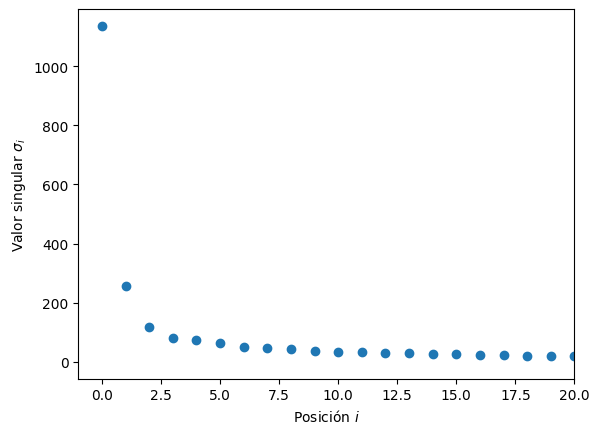

In [ ]:
plt.scatter(range(len(S)),S)
plt.xlabel('Posición $i$')
plt.ylabel('Valor singular $\sigma_i$')
#plt.yscale('log') # Prueben poner y sacar escala log para comparar
#plt.xlim(-1,20) # Prueben poner y sacar para comparar
#plt.xlim(970,1000) # Prueben poner y sacar para comparar

Podemos ver que hay tres regimenes: hay un primer conjunto de valores singulares muy significativo (podemos decir que los primeros $5$). Luego observamos un decrecimiento suave desde $10$ hasta $1/100$, y al llegar al rango de la matriz una caida abrupta a $10^{-12}$. Con lo cual, pareciera que el grueso de la información se encuentra en los primeros valores singulares. Otra forma de graficar esto mismo que es muy común, es como la suma acumulada de los valores singulares.

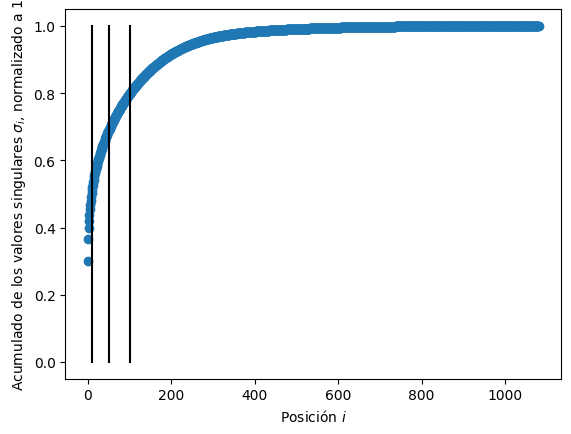

In [ ]:
plt.scatter(range(len(S)),np.cumsum(S)/sum(S))
plt.xlabel('Posición $i$')
plt.ylabel('Acumulado de los valores singulares $\sigma_i$, normalizado a 1')
plt.plot([10,10],[0,1],'k')
plt.plot([50,50],[0,1],'k')
plt.plot([100,100],[0,1],'k')

Este gráfico nos muestra que con 100 valores singulares, por ejemplo, ya alcazamos a capturar el 80% de la norma 2 de la matriz. Con solo 10, ya tenemos el 50%

Lo que sigue es ver como se ven las imágenes que obtendriamos en cada caso. Más allá de cuánto capturemos de la norma, si la imagen no es buena, el método no sería útil.

In [ ]:
# Armamos una función que reciba un rango s y devuelva la matriz aproximada hasta rango s

def hasta_rango_s(svdA,s):
    # svdA es la descomposición SVD de A, s es el rango que se desea preservar
    U,S,Vt = svdA
    As = U[:,:s] @ np.diag(S[:s,]) @ Vt[:s,:]
    return(As)



In [ ]:
svdimgGray = np.linalg.svd(imgGray) # Computamos la SVD


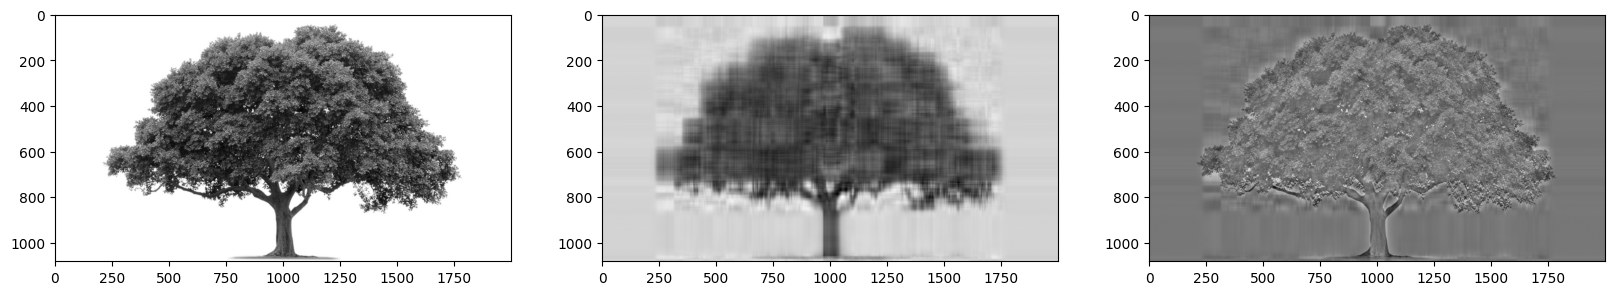

In [ ]:
rango_s = 10 # Prueben distintos valores
fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(imgGray, cmap='gray')
imgGray_s = hasta_rango_s(svdimgGray,rango_s)
ax[1].imshow(imgGray_s, cmap='gray')
ax[2].imshow(imgGray-imgGray_s, cmap='gray')


### Ejercicio
Comparen las imágenes que se obtienen conforme van agregando detalle a la imagen. ¿Qué diferencias notan? ¿Cuántos valores singulares necesito para ganar detalle en las hojas del árbol?¿Cómo cambia la diferencia entre imágenes con el número de valores singulares?

Se puede apreciar que, a mayor detalle a la imagen (mayor cantidad de valores singulares tomados), la diferencia entre la imagen original y la comprimida es menor. Más aún, llega un punto en donde las diferencias son casi nulas, que esto es cuando el rango de la matriz A_s (esto es, el rango que se desea preservar) sea aproximadamente 100, es decir, se conserven 100 valores singulares.
En conclusion, el número de valores singulares tomados en cuenta para representar la imagen es importante hasta cierto punto, pues luego de determinado valor singular ya no se presentan las diferencias "necesarias" mara marcar una gran diferencia. Los valores singulares provocan un gran cambio al principio (primeros 10-100 valores); pero luego van perdiendo su significatividad, por lo que no son necesarios.

### Ejercicio
Hagan una grilla de graficos, mostrando 10 valores equiespaciados en escala logaritmica de rango $s$ entre 1 y el rango de la imagen

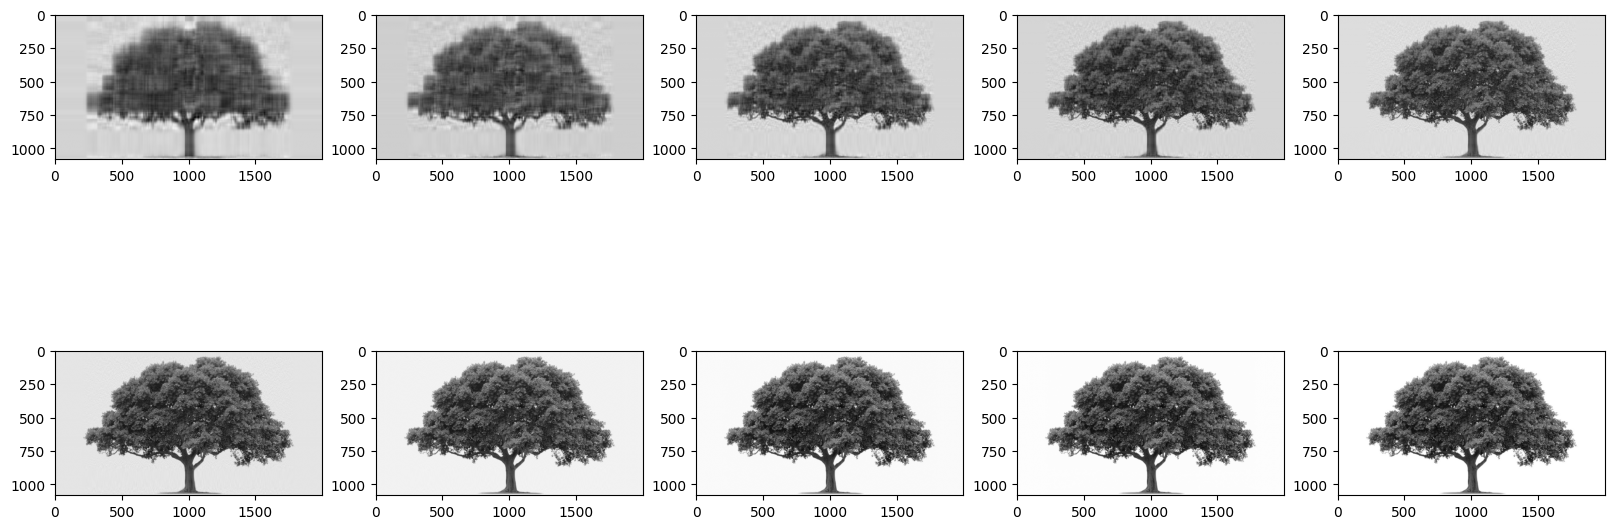

In [ ]:
def hasta_rango_s(svdA, s):
    U, S, Vt = svdA
    As = U[:, :s] @ np.diag(S[:s]) @ Vt[:s, :]
    return As


m, n = imgGray.shape
max_rank = min(m, n)
r = np.logspace(1, np.log10(max_rank), num=10)  # rango máximo logarítmico hasta min(m,n)

fig,ax = plt.subplots(2,5,figsize=(20,8))

for i in range(10):
    k = int(r[i])
    if k > max_rank:
        k = max_rank
    imgGray_s = hasta_rango_s(svdimgGray, k)
    ax[i // 5, i % 5].imshow(imgGray_s, cmap='gray')

plt.show()

#svdimgGray = np.linalg.svd(imgGray) # Computamos la SVD

#r = np.logspace(1, imgGray.shape[0], num=10)

#fig,ax = plt.subplots(5,5,figsize=(20,20))


#for i in range(10):
#  k = int(r[i]) # convertir a entero
#  imgGray_s = hasta_rango_s(svdimgGray,k)
#  ax[i // 5, i % 5].imshow(imgGray, cmap='gray')


### Ejercicio

Muestren como cambia el error máximo de la aproximación SVD con la cantidad de valores singulares considerados.

La norma 2 de ||A - A1|| es 350.8757021302369
La norma 2 de ||A - A2|| es 240.99605468596474
La norma 2 de ||A - A4|| es 193.73873799387357
La norma 2 de ||A - A10|| es 141.87580537014625
La norma 2 de ||A - A21|| es 110.1488747740789
La norma 2 de ||A - A46|| es 81.66690360122445
La norma 2 de ||A - A100|| es 51.08511220918263
La norma 2 de ||A - A215|| es 18.345304024693725
La norma 2 de ||A - A464|| es 2.4877533721532465
La norma 2 de ||A - A782|| es 0.3509573171098403


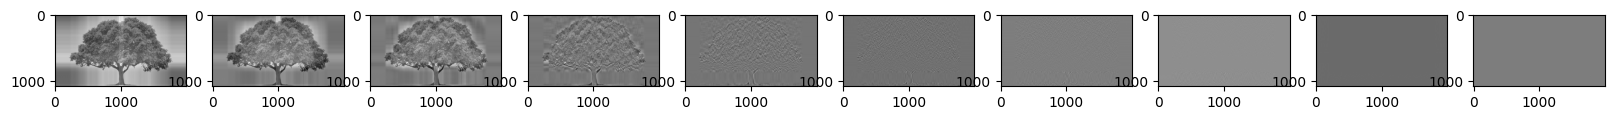

In [ ]:
s = np.logspace(0,3,num=10, dtype=np.int64)
s[len(s)-1] = 782
fig, ax = plt.subplots(1,len(s), figsize=(20,20))
cosa = 0
for i in s:
  print(f"La norma 2 de ||A - A{i}|| es " + str(np.linalg.norm(imgGray - hasta_rango_s(svdimgGray,i))))
  imgGray_s = hasta_rango_s(svdimgGray,i)
  ax[cosa].imshow(imgGray-imgGray_s, cmap='gray')
  cosa = cosa + 1


### Ejercicio: Otras imágenes

Prueben repetir el ejercicio anterior con otras imágenes. Identifiquen qué cantidad de valores singulares son necesarios para captar aproximar bien cada una. Caracterizen cualitativamente qué tipo de detalles hacen que una imagen requiera más valores singulares para ser bien aproximada visualmente.

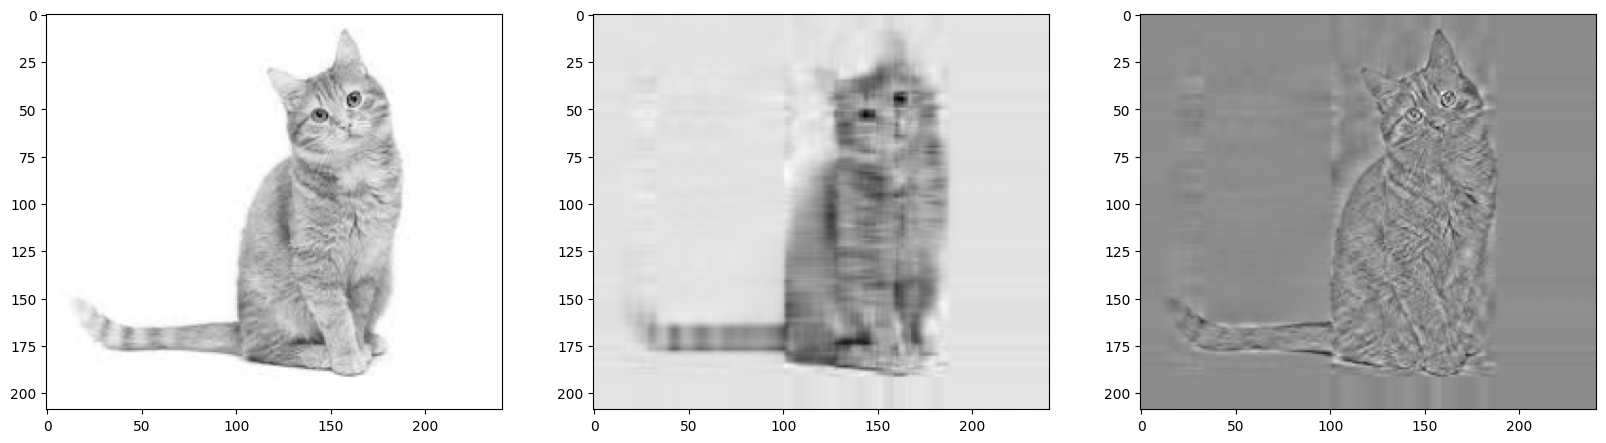

In [ ]:
img2 = io.imread('gato.jpg')

# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray2 = color.rgb2gray(img2)

def hasta_rango_s(svdA,s):
    # svdA es la descomposición SVD de A, s es el rango que se desea preservar
    U,S,Vt = svdA
    As = U[:,:s] @ np.diag(S[:s,]) @ Vt[:s,:]
    return(As)


svdimgGray = np.linalg.svd(imgGray2) # Computamos la SVD

rango_s = 10 # Prueben distintos valores
fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(imgGray2, cmap='gray')
imgGray_s = hasta_rango_s(svdimgGray,rango_s)
ax[1].imshow(imgGray_s, cmap='gray')
ax[2].imshow(imgGray2-imgGray_s, cmap='gray')

## Aplicación 2: Análisis de componentes principales

Otra de las aplicaciones típicas de SVD es el cálculo de componentes principales en un dataset. La idea del análisis de componentes principales se centra en aplicar SVD a la matriz de [covarianza de los datos](https://es.wikipedia.org/wiki/Covarianza). La matriz de covarianza captura en su diagonal la [varianza](https://es.wikipedia.org/wiki/Varianza) de cada uno de las variables de interés, y en sus elementos fuera de la diagonal captura cómo estas están relacionadas.

En este caso, nuestro punto de partida es un conjunto de $m$ [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) $X_1,\dots,X_m$. Suponemos que tenemos $n$ mediciones de cada una de ellas, $x_{ij}$, con $1\leq i \leq n$ y $1 \leq j \leq m$ (es decir, $x_ij$ es la realización o medición $i$ esima de $X_j$). Podemos acomodar estas mediciones en una matriz $A \in \mathbb{R}^{n \times m}$, con $n$ el número de observaciones, y $m$ el número de variables, y por lo tanto $A_{ij} = x_{ij}$.

El análisis de componentes principales empieza por calcular la versión centrada y escalada de $A$, donde

$$
\tilde A_{ij} = \frac{x_{ij} - \mu_j}{\frac{1}{n-1}\sqrt{\sum^n_{i=1}(x_{ij} - \mu_j )^2}}
$$
donde $\mu_j = \frac{1}{n} \sum^n_{i=1} x_{ij}$ es el promedio muestral, $(x_{ij} - \mu_j )^2$ es una estimación de la varianza muestral (y su raíz una estimación del desvio estandar). Entonces, $S= A^tA \in \mathbb{R}^{m \times m}$ es una estimación de la matriz de [correlaciones](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) de las variables aleatorias $X_1,\dots,X_m$. Los autovalores de $S$ son los valores singulares de $A$ al cuadrado, y nos permiten identificar qué combinaciones lineales de las variables $X_1,\dots,X_m$ están asociadas a la mayor variabilidad de los datos.

Intuitivamente, si nuestro interés es reducir la dimensión de un dataset, entonces lo que queremos hacer es pasar de un conjunto de variables $X_1,\dots,X_m$ a otro $Y_1,\dots,Y_k$, con $k<m$, donde el conjunto de variables $Y$ almacenan el grueso de información de las variables $X$. Usando SVD sobre la matriz $A$ (o sobre la matriz $S$) podemos encontrar las variables $Y$ que son combinación lineal de las $X$ y capturan el grueso de la variabilidad de las $X$ (que en este caso se asocia a la cantidad de información que aportan a un dataset).

In [ ]:
# Veamos un caso bastante extremo, tenemos 5 variables donde en realidad todas son proporcionales entre sí (más algo de ruido)

n = 100 # Tamaño del dataset
Vcoef = np.asarray([50,-30,60,80,150]) # Coeficientes de combinaciones lineales
#Vcoef = np.asarray([0,300,60,80,150]) # Coeficientes de combinaciones lineales
escala_ruido=1
X0 = np.random.uniform(size=n) # Esta sería la variable "escondida", la única dimensión del problema
A = np.asarray([  # Todas las observaciones salen de la misma variable, más un poco de ruido
    coe*X0 + np.random.normal(0,escala_ruido,size=n) for coe in Vcoef
]).T

tildeA = (A - np.mean(A,axis=0))/np.std(A,axis=0) # Normalizamos las columnas y filas para que todo estén alrededor del [-1,1]

U,Sigma,Vt = np.linalg.svd(tildeA)

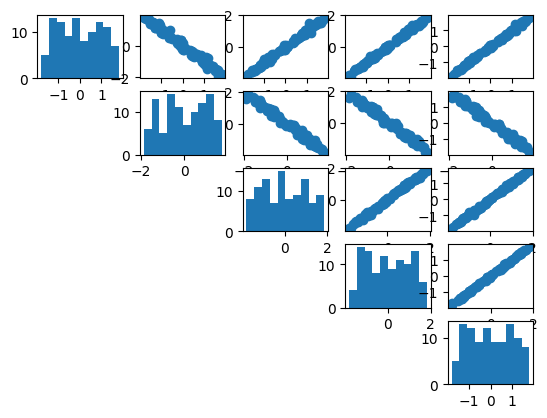

In [ ]:
# Veamos como se ven las variables antes de seguir

fig,axs = plt.subplots(tildeA.shape[1],tildeA.shape[1])
for i in range(tildeA.shape[1]):
    for j in range(tildeA.shape[1]):
        if i == j :
            axs[i][j].hist(tildeA[:,i])
        elif i<j:
            axs[i][j].scatter(tildeA[:,i],tildeA[:,j])
        else:
            fig.delaxes(axs[i][j])

La correlación lineal en este ejemplo es muy extrema, haciendo muy obvio que en realidad hay una única dimensión en el problema. Si miramos los valores singulares, es inmediato ver que uno destaca por encima del resto.

Text(0, 0.5, 'Valor singular $\\sigma_i$')

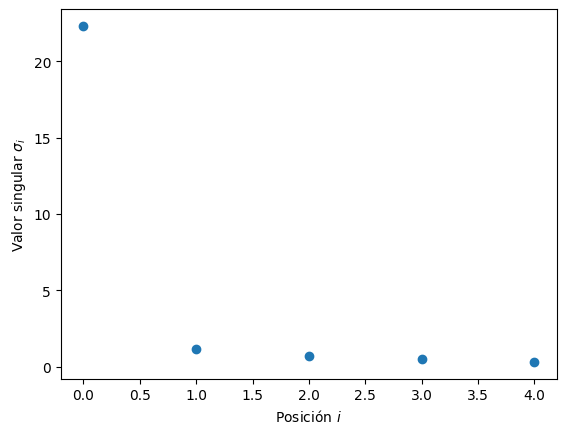

In [ ]:
plt.scatter(range(len(Sigma)),Sigma)
plt.xlabel('Posición $i$')
plt.ylabel('Valor singular $\sigma_i$')


### Ejercicio

Prueben cambiar los coeficientes de las combinaciones lineales, y vean como cambia la distribución de valores singulares. En particular, sabiendo que el ruido agregado es del orden de $1$, vean que pasa cuando los coeficientes son del orden del ruido, o son mucho menores que 1. Observen que pasa si todos los coeficientes son mucho mayores que 1, excepto uno de ellos que es estrictamente 0. Interpreten el resultado en términos del número de valores singulares significativos

Si sucede esto, lo que sigue ocurriendo es que hay un valor singular el cual tiene mucha más importancia que el resto; pero también sucede que el segundo valor singular tambén es importante, por lo que hay otra variable que también es relevante en este caso. Además, respecto a la relación entre las variables, se puede apreciar que, si bien en algunas no se presentan relaciones claras; en las que sí hay una relación lineal creciente (es decir, marcan una función lineal creciente).


En el análisis de componentes principales tiene especial relevancia identificar la combinación lineal de las variables que está asociada al mayor valor singular (vale mencionar que el mayor valor singular es igual a la desviación estandar de dicha combinación lineal). Esto se puede obtener en términos de la matriz $Vt$, siendo su primer fila. En este ejemplo es poco interesante, ya que cualquier combinación lineal de las variables resulta en algo proporcional al $X_0$ del ejemplo. Sin embargo, cuando hay más de una variable relevante nos puede dar información sobre cuales son las variables relevantes subyacentes.

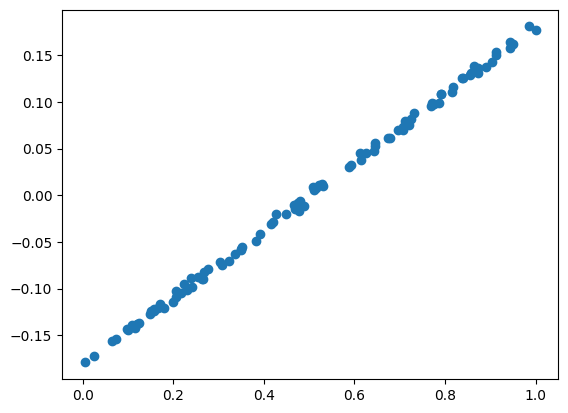

In [ ]:
# Vean como se recupera la variable latente X0 a través de la primer columna de U
plt.scatter(X0,U[:,0])


In [ ]:
# Veamos un ejemplo con dos variables latentes

# Veamos un caso bastante extremo, tenemos 5 variables donde en realidad todas son proporcionales entre sí (más algo de ruido)

n = 100 # Tamaño del dataset
XA = np.random.uniform(size=n) # Esta sería la variable "escondida", la única dimensión del problema
XB = np.random.uniform(size=n) # Esta sería la variable "escondida", la única dimensión del problema
A = np.asarray([  # Todas las observaciones salen de la misma variable, más un poco de ruido
    50*XA + 25*XA + np.random.normal(0,1,size=n),
    -30*XA + 150*XB+ np.random.normal(0,1,size=n),
    60*XA - 15*XB + np.random.normal(0,1,size=n),
    -5*XA + 80*XB + np.random.normal(0,1,size=n),
    -150*XB + 20*XB+ np.random.normal(0,1,size=n)
]).T

tildeA = (A - np.mean(A,axis=0))/np.std(A,axis=0) # Normalizamos las columnas y filas para que todo estén alrededor del [-1,1]

U,Sigma,Vt = np.linalg.svd(tildeA)

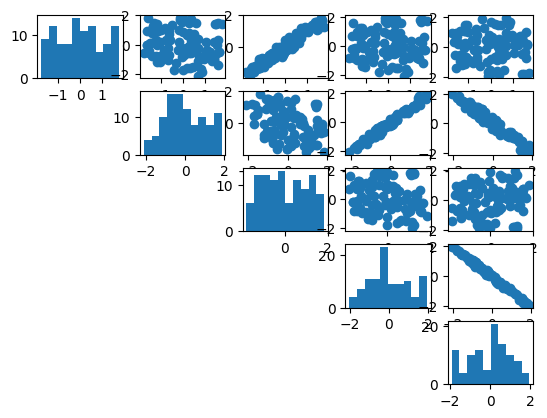

In [ ]:
# Veamos como se ven las variables antes de seguir

fig,axs = plt.subplots(tildeA.shape[1],tildeA.shape[1])
for i in range(tildeA.shape[1]):
    for j in range(tildeA.shape[1]):
        if i == j :
            axs[i][j].hist(tildeA[:,i])
        elif i<j:
            axs[i][j].scatter(tildeA[:,i],tildeA[:,j])
        else:
            fig.delaxes(axs[i][j])

En este ejemplo, se puede ver como algunas combinaciones dan lugar a variables muy correlacionadas, y otras que parecieran no estar vinculadas entre sí (las que dan lugar a nubes de puntos). Veamos qué nos dice PCA en este caso.

Text(0, 0.5, 'Valor singular $\\sigma_i$')

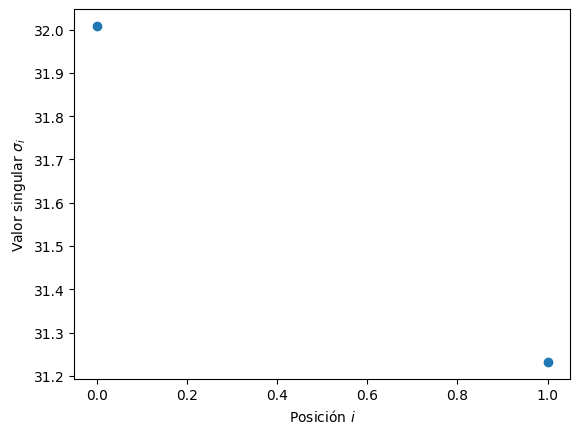

In [ ]:
plt.scatter(range(len(Sigma)),Sigma)
plt.xlabel('Posición $i$')
plt.ylabel('Valor singular $\sigma_i$')


Pueden ver que el método identifica correctamente que hay solo dos variables latentes que son relevantes, mientras que el resto son "espureas". ¿Cuáles son las variables que son relevantes?

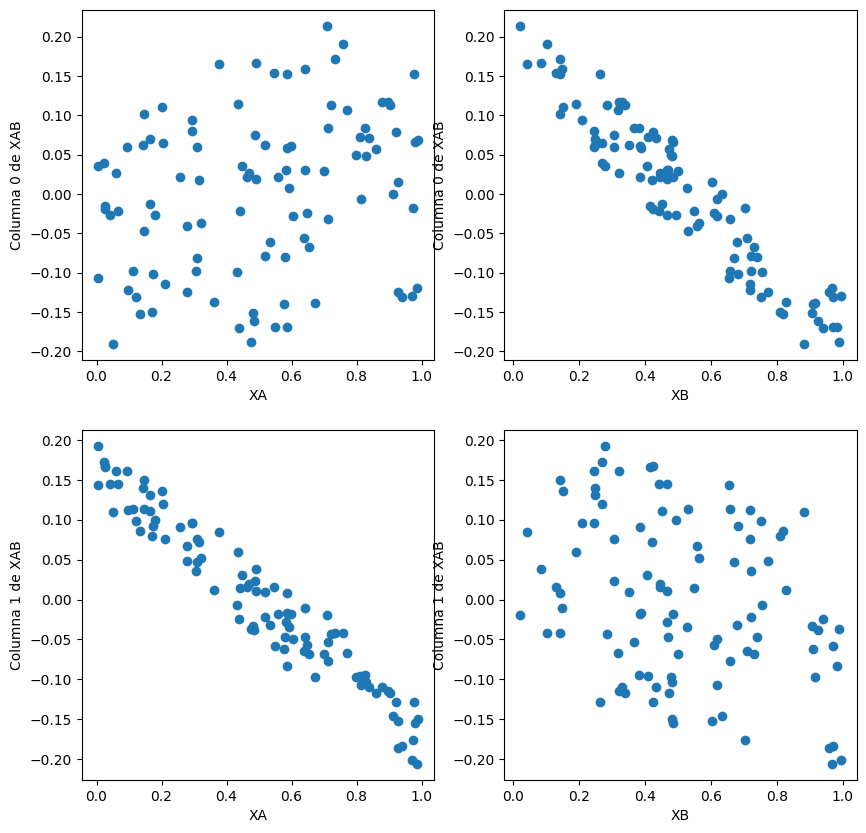

In [ ]:
XAB = U[:,:2]
# Veamos como se ven las variables antes de seguir

fig,axs = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
    axs[i][0].scatter(XA,XAB[:,i])
    axs[i][0].set_xlabel('XA')
    axs[i][0].set_ylabel('Columna ' + str(i) + ' de XAB')
    axs[i][1].scatter(XB,XAB[:,i])
    axs[i][1].set_xlabel('XB')
    axs[i][1].set_ylabel('Columna ' + str(i) + ' de XAB')


Aquí pueden ver como las dos primeras columnas de $U$, asociadas a las dos primeras componentes de mayor varianza, correlacionan muy bien con $X_A$ y $X_B$.

### Correlaciones no-lineales

Lamentablemente, si bien esta es una herramienta extremadamente potente cuando las relaciones son lineales entre las variables, puede fallar estrepitosamente si las relaciones son no-lineales.

Para ejemplificar, construyamos un círculo ruidoso:

In [ ]:
# Veamos un caso bastante extremo, tenemos 5 variables donde en realidad todas son proporcionales entre sí (más algo de ruido)

n = 1000 # Tamaño del dataset
X0 = np.random.uniform(low=0,high=2*np.pi,size=n) # Esta sería la variable "escondida", la única dimensión del problema
A = np.asarray([  # Todas las observaciones salen de la misma variable, más un poco de ruido
    np.cos(X0) + np.random.normal(0,.1,size=n),
    np.sin(X0) + np.random.normal(0,.1,size=n)
]).T

tildeA = (A - np.mean(A,axis=0))/np.std(A,axis=0) # Normalizamos las columnas y filas para que todo estén alrededor del [-1,1]

U,Sigma,Vt = np.linalg.svd(tildeA)

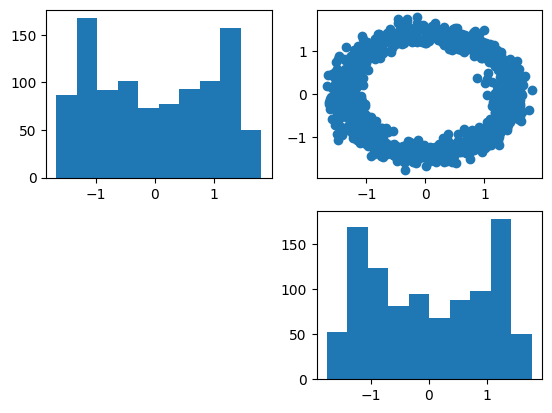

In [ ]:
# Veamos como se ven las variables antes de seguir

fig,axs = plt.subplots(tildeA.shape[1],tildeA.shape[1])
for i in range(tildeA.shape[1]):
    for j in range(tildeA.shape[1]):
        if i == j :
            axs[i][j].hist(tildeA[:,i])
        elif i<j:
            axs[i][j].scatter(tildeA[:,i],tildeA[:,j])
        else:
            fig.delaxes(axs[i][j])

Viendo esto, es fácil concluir que las variables están relacionadas entre sí. Sin embargo, si miramos las varianzas, son comparables en ambas direcciones.

In [ ]:
Sigma

array([31.67819159, 31.56726433])

Esto implica que ambas componentes son significativas. Si graficamos las columnas de $U$ entre sí, vemos que en realidad siguen representando el círculo original. Es decir, no se extrajo nada de información del sistema.

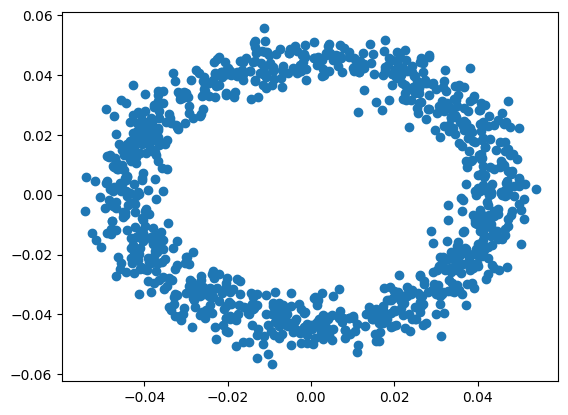

In [ ]:
plt.scatter(U[:,0],U[:,1])

## Eigenfaces

Eigenfaces (en español caras propias) es el nombre dado a un conjunto de autovectores cuando se utiliza en el problema de visión artificial del reconocimiento de rostros humanos. Matthew Turk y Alex Pentland lo propusieron en su [paper en la clasificación de caras](https://doi.org/10.1162/jocn.1991.3.1.71).

Aquí se muestra como hacer el cálculo del Análisis en Componentes Principales para los datos de los rostros, y luego aplicarlos para la reducción del espacio. Con este nuevo espacio se realizan dos tareas: reconstrucción y clasificación.

In [ ]:
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold

Definición de funciones

In [ ]:
def splitDataset(data, label):
    # split dataset en entrenamiento y test
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    for train, test in skf.split(data.T, label.T):
        break
    train_data = data[:,train]
    train_lab = label[:,train]
    test_data = data[:,test]
    test_lab = label[:,test]

    return train_data, train_lab, test_data, test_lab

In [ ]:
def showPic(data, idx, dx=38):
    # graficamos una rotro
    v = data[:,idx] # primera columna
    m = v.reshape((dx,dx)).T
    plt.imshow(m, cmap=plt.cm.gray)


La lectura del archivo de datos nos devuelve dos matrices, una correspondiente a las imágenes de los rostros y la otra a un label que indica a cual
persona pertenece la imágen.

<img src="image_vector.png" />

Como vemos en la figura, las imágenes se convirtieron a vector, con N=38 para este set de datos.

10


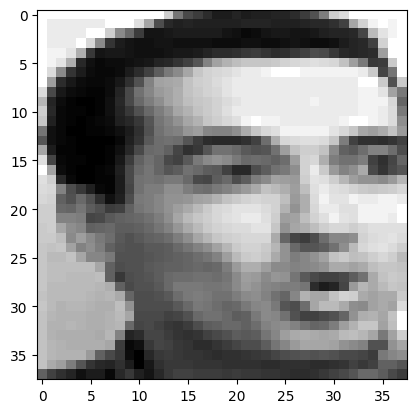

In [ ]:
mat = sio.loadmat('base_40_38_10.mat')
# data es una matriz de 1444 x 380.
# Corresponde a figuras de caras de tamanio 38x38 pixeles
data = mat['data']
label = mat['label']
# extraemos la dimensionalidad de data, donde n es la cantidad de ejemplos, y d la dimensión del espacio.
d, n = data.shape

showPic(data, 51)

print(label.max())

## Análisis de Componentes Principales (ACP o PCA en inglés)

Vamos a hacer una modificación respecto del formalismo que usamos en la sección precedente, ya que vamos a acomodar las muestras (los rostros) como columnas.
Tampoco vamos a dividir por el desvío estándar ya que las imágenes están acotadas en sus valores de niveles de gris de los pixeles (y por lo tanto están en la misma escala).


Primero centramos los valores de las imágenes, restando la media.
Luego calculamos la matriz de covarianzas:


$C = \frac{1}{n} \sum_{i=1}^n (x_i - \mu) (x_i - \mu)^{T}$

Finalmente encontramos los autovalores y autovectores de esta matriz, los cuales ordenamos de mayor a menor valor.

In [ ]:
def calculoACP(data):
    dx = 38
    d, n = data.shape
    m=np.mean(data, axis=1)
    print(m)
    plt.imshow(m.reshape((dx,dx)).T, cmap=plt.cm.gray)

    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    Mcov = np.dot(X,X.T) / n # Covariance Matrix

    U, D, Vt = np.linalg.svd(Mcov)

    # ordenamos los autovalores de mayor a menor
    idx = np.argsort (- D )
    D = D[idx]
    U = U[:, idx]

    return D, U, X, m

[0.97640867 0.92544892 0.92584107 ... 0.49713106 0.39457172 0.20026832]


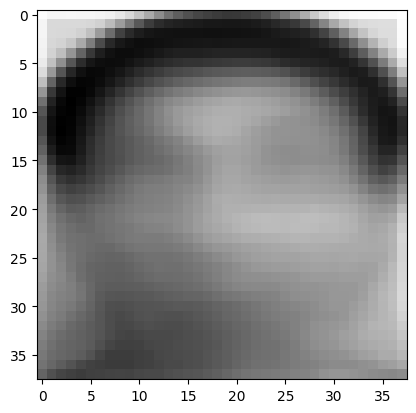

In [ ]:
D, U, data_ref, m = calculoACP(data)

Veamos como se ven las imágenes que quedan representadas en las columnas de U

[-0.00170085 -0.00541249 -0.00543087 ... -0.01612915 -0.01493809
 -0.00550855]


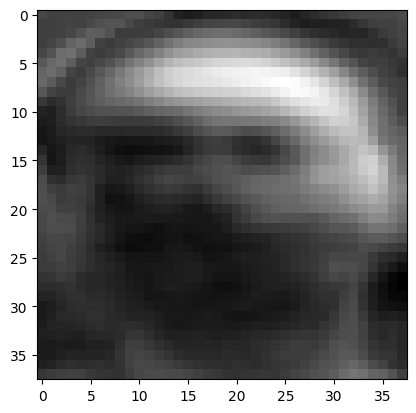

In [ ]:
showPic(U, 0)
print(U[:,0])

El espacio de proyección del ACP esta compuesto por el vector V que es de tamaño $n \times n$.

El próximo paso busca la reducción del espacio de proyección, para quedarnos con aquellos autovectores en V que acumulen la mayor cantidad de información posible en las distintas direcciones.

Para ello se hace un cómputo de la varianza acumulada en el vector D, y se selecciona una cantidad que signifique representar un 95 % de la información.

Cantidad de autovectores de representación al 95 %:  94


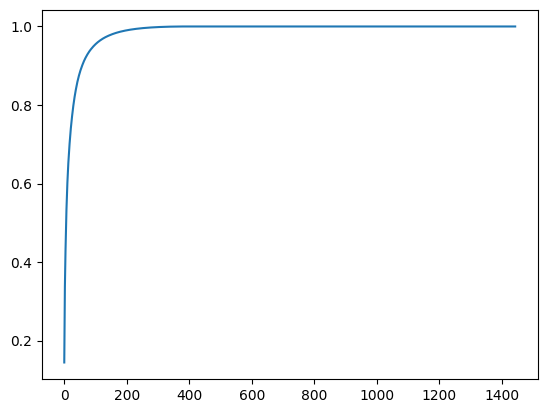

In [ ]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)

### Reconstrucción de un rostro

El hecho que quedarse con menos autovectores para la proyección del espacio, conlleva a una reducción de almacenamiento de la información, pero al mismo tiempo a cometer un error al tratar de reconstruir la imagen original.

En este tramo de código representamos visualmente la imagen original y la reconstruida con M autovectores.

(94,)


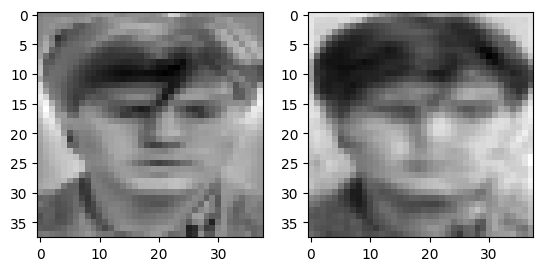

In [ ]:
# Reconstruccion
idx_im = 5
im_orig = data_ref[:,idx_im]
cpM = U[:,0:M].T @ im_orig

print(cpM.shape)

im_rec = U[:,0:M] @ cpM

fig, axes = plt.subplots(1,2)
axes[0].imshow(im_orig.reshape((38,38)).T, cmap=plt.cm.gray)
axes[1].imshow(im_rec.reshape((38,38)).T + m.reshape((38,38)).T, cmap=plt.cm.gray)
plt.show()

## Clasificación de nuevas imágenes

La tarea de clasificación en predecir a quien de las personas de la base de conocimientos pertenece un rostro de testing. Esto lo vamos a realizar gracias a proyectar el rostro de entrada al espacio de ACP y calcular por distancias, cual es rostro más cercano.

En primer lugar separamos

[0.97569557 0.92659072 0.92721073 ... 0.47565682 0.36191583 0.18090367]


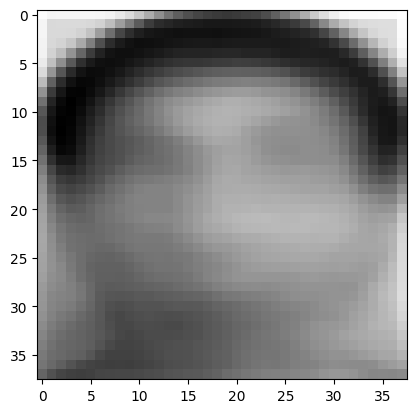

In [ ]:
# clasificacion
train_data, train_lab, test_data, test_lab = splitDataset(data, label)
Dt, Ut, train_ref, m = calculoACP(train_data)

Luego elegimos la cantidad de componentes que vamos a usar

Cantidad de autovectores de representación al 95 % de la base de entrenamiento:  83


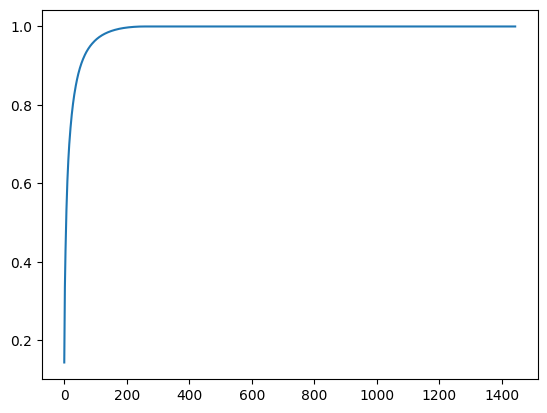

In [ ]:
ratio = np.cumsum(Dt) / np.sum(Dt)
plt.plot(ratio)
x = np.where(ratio > 0.95)[0]
M = x[0]
print('Cantidad de autovectores de representación al 95 % de la base de entrenamiento: ', M)

Y por último elegimos la etiqueta en base a la proyección de la imagen

In [ ]:
data_clf = train_ref.T @ Ut[:,0:M]   # proyectamos a la base de entrenamiento, de los cuales conocemos a que persona pertenece

input_test = test_data[:,0] # vamos a clasificar el primer sujeto de la base de test
test_acp = (input_test - m) @ Ut[:,0:M]    # le resto la media y proyecto en el espacio reducido de Vt
Q = np.tile(test_acp.reshape((1,-1)), (data_clf.shape[0], 1))
dist = np.linalg.norm(data_clf - Q, axis=1)    # calculo las distancias a cada una de las imágenes de conocimientos proyectadas en el espacio ACP.
y = np.argmin(dist)                             # clasificar por el más cercano

if test_lab[0][0] == train_lab[0][y]:
    print('Clasificacion correcta')
else:
    print('clasificacion incorrecta')

Clasificacion correcta


### Ejercicio

Ejecutar el script anterior pero evaluando el error de clasificaciones correctas e incorrectas para todo el test_data.


[0.97569557 0.92659072 0.92721073 ... 0.47565682 0.36191583 0.18090367]
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasificacion correcta
Clasific

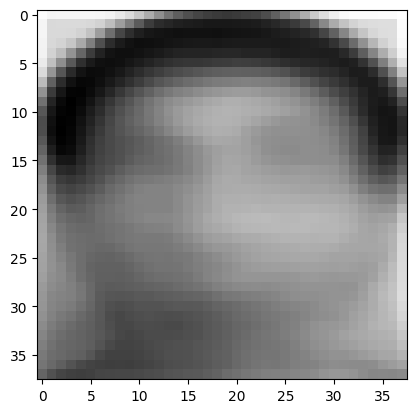

In [ ]:
# clasificacion
train_data, train_lab, test_data, test_lab = splitDataset(data, label)
Dt, Ut, train_ref, m = calculoACP(train_data)

data_clf = train_ref.T @ Ut[:,0:M]   # proyectamos a la base de entrenamiento, de los cuales conocemos a que persona pertenece

for i in range(test_data.shape[1]):
  input_test = test_data[:,i] # vamos a clasificar a todos  los sujetos de la base de test
  test_acp = (input_test - m) @ Ut[:,0:M]    # le resto la media y proyecto en el espacio reducido de Vt
  Q = np.tile(test_acp.reshape((1,-1)), (data_clf.shape[0], 1))
  dist = np.linalg.norm(data_clf - Q, axis=1)    # calculo las distancias a cada una de las imágenes de conocimientos proyectadas en el espacio ACP.
  y = np.argmin(dist)                             # clasificar por el más cercano

  if test_lab[0][i] == train_lab[0][y]:
      print('Clasificacion correcta')
  else:
      print('clasificacion incorrecta')